In [181]:
import PIL
from PIL import Image
from matplotlib import image
import numpy as np
import matplotlib
from PIL import ImageColor
import sys
from PIL import Image, ImageDraw 

In [182]:
imagem = Image.open("teste1.png")

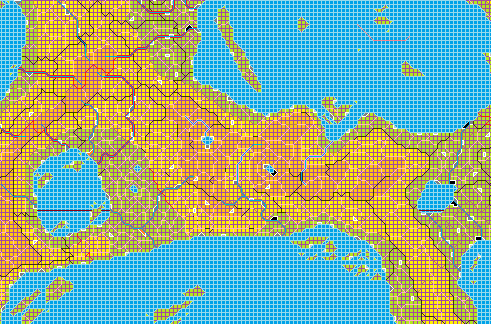

In [183]:
imagem

In [184]:
#FUNÇÕES PARA ANALISE DA IMAGEM

def info (x):
    return (x.size)
   
    
def cores_in (x):
    cores = []
    for cor_rgb in x.getdata():
        if cor_rgb not in cores:
            cores.append(cor_rgb)

    print(cores)
    
def convert_rgba4hex(x):
    
    hex = (matplotlib.colors.to_hex(x))
    rgb = ImageColor.getcolor(hex, "RGB")
    return(rgb)


In [185]:
data = image.imread("teste1.png")

In [186]:
cores_in(imagem)

[(153, 217, 234, 255), (255, 255, 255, 255), (0, 162, 232, 255), (185, 122, 87, 255), (163, 73, 164, 255), (255, 174, 201, 255), (66, 41, 28, 255), (237, 28, 36, 255), (127, 127, 127, 255), (181, 230, 29, 255), (255, 242, 0, 255), (195, 195, 195, 255), (245, 137, 142, 255), (0, 0, 0, 255), (255, 201, 14, 255), (255, 127, 39, 255), (136, 0, 21, 255)]


In [187]:
# AGRUPAR OS PIXELS DAS CORES 

mar = [(0, 162, 232),(128, 255, 255)]
terra = [(255, 242, 0),(181, 230, 29),(255, 127, 39),(195, 195, 195),(127, 127, 127),(255,255,255),(34,177,76),(0,0,0),(255,201,14)]
fronteira = [(185, 122, 87),(66, 41, 28),(255, 174, 201),(237, 28, 36)]
grid = [(153,217,234),(136,0,21),(245,137,142)]
cidade = [(255, 127, 39),(195, 195, 195),(127, 127, 127),(255,255,255),(0,0,0)]
Wasteland = [(200, 191, 231)]
fronteira_maritma = [(245,137,142)]
roxo = [(163,73,164),(200, 191, 231),(153,217,234)]
#'grid_roxo':[163, 73, 164],
diagonal_especifico = [(185, 122, 87),(66, 41, 28),(255, 174, 201),(237, 28, 36),(0, 162, 232)]
grupos = [mar,terra,fronteira,grid,cidade,Wasteland,fronteira_maritma,roxo,diagonal_especifico]

In [188]:
# ALINHAR QUINAS

inix=0
iniy=0
while True:
    if convert_rgba4hex(data[0,inix]) in grupos[7] or convert_rgba4hex(data[0,inix]) in grupos[2] :              
        if convert_rgba4hex(data[1,inix]) in grupos[7] or convert_rgba4hex(data[1,inix]) in grupos[2] :
            if convert_rgba4hex(data[2,inix]) in grupos[7] or convert_rgba4hex(data[2,inix]) in grupos[2] :
                
                inix=inix%4
                break
    inix+=1    
    
while True:
    if convert_rgba4hex(data[iniy,0]) in grupos[7] or convert_rgba4hex(data[iniy,0]) in grupos[2] :        
        if convert_rgba4hex(data[iniy,1]) in grupos[7] or convert_rgba4hex(data[iniy,1]) in grupos[2] :        
            if convert_rgba4hex(data[iniy,2]) in grupos[7] or convert_rgba4hex(data[iniy,2]) in grupos[2] :
               
                iniy=iniy%4
                break
    iniy+=1
   

In [189]:
data = data[iniy:,inix:]

In [190]:
tamx =  ((info(imagem)[1]-inix-1)//4)
tamy =  ((info(imagem)[0]-iniy-1)//4)



In [191]:
info(imagem)

(491, 324)

In [192]:
nomes = {'agua':(0, 162, 232),'terra_amarela':(255, 242, 0),'terra_verde':(181, 230, 29),'terra_laranja':(255, 127, 39),'terra_cinza_claro':(195, 195, 195),'terra_cinza_escuro':(127, 127, 127),'terra_branca':(255,255,255),'fronteira_marrom':(185, 122, 87),'fronteira_cultura':(66, 41, 28),'fronteira_rosa':(255, 174, 201),'grid_azul':(153,217,234),'meridiano':(136,0,21),'terra_laranja':(255, 127, 39),'terra_cinza_claro':(195, 195, 195),'terra_cinza_escuro':(127, 127, 127),'terra_branca':(255,255,255)}

In [193]:
def checar (x,y,total,salvar2,reptiçao):
    
    
    espaço = salvar2[y:y+2 ,x:x+len(total)+1]
        
   
    if(np.sum(espaço) == 0):
    
        salvar2[y:y+2,x:x+len(total)+1] = 1        
        return (x,y,salvar2)
    
    elif reptiçao==0:
        return (checar(x,y+2,total,salvar2,3))  
        
    
    else:
        if np.sum(espaço[0]) > 0 :
        
            if (np.sum(espaço)) != (np.sum(espaço[0])):
                
                if np.sum(espaço[:,0]) > np.sum(espaço[:,-1]):
                    var1=1
                    if(reptiçao+1 == 0):
                        var1=0
                    return (checar(x+1,y,total,salvar2,var1))
                elif np.sum(espaço[:,-1]) > np.sum(espaço[:,0]):
                    var1=-1
                    if(reptiçao-1 == 0):
                        var1=0
                    return (checar(x-1,y,total,salvar2,var1))
                else:
                    return (checar(x,y+2,total,salvar2,3))  
            else:
                var1=2
                if(reptiçao+2 == 0):
                    var1=0
                return (checar(x,y+1,total,salvar2,var1))
        
        else:
            var1=-2
            if(reptiçao-2 == 0):
                var1=0
            
            return (checar(x,y-1,total,salvar2,var1))
            


In [194]:

def escrever(i2,total,x,y):
    
    
    x=x+inix
    y=y+iniy
    img1 = i2
    for i in total:
        
        if i == "0":
            img2 = Image.open(r"0_.png") 
            img1.paste(img2, (x,y), mask = img2)
        elif i == "1":
            img2 = Image.open(r"1_.png") 
            img1.paste(img2, (x,y), mask = img2)
        elif i == "2":
            img2 = Image.open(r"2_.png") 
            img1.paste(img2, (x,y), mask = img2)
        elif i == "3":
            img2 = Image.open(r"3_.png") 
            img1.paste(img2, (x,y), mask = img2)
        elif i == "4":
            img2 = Image.open(r"4_.png") 
            img1.paste(img2, (x,y), mask = img2)
        elif i == "5":
            img2 = Image.open(r"5_.png") 
            img1.paste(img2, (x,y), mask = img2)
        elif i == "6":
            img2 = Image.open(r"6_.png") 
            img1.paste(img2, (x,y), mask = img2)
        elif i == "7":
            img2 = Image.open(r"7_.png") 
            img1.paste(img2, (x,y), mask = img2)
        elif i == "8":
            img2 = Image.open(r"8_.png") 
            img1.paste(img2, (x,y), mask = img2)
        elif i == "9":
            img2 = Image.open(r"9_.png") 
            img1.paste(img2, (x,y), mask = img2)   
        elif i == ".":
            img2 = Image.open(r"._.png") 
            img1.paste(img2, (x,y), mask = img2)
        
        x+=4 
        i2=img1  
 

In [195]:
def draw (i2,total,x,y,salvar2):
  
    total=str(total)    
    
    if total[-1] == ("5"):
        if total[0] == "0":
            total = total[1:]
        
        total = total[:-1]
        
    else:
        total = total[:-2]
    
    
    x=int(x) 
    y=int(y)
    r = checar(x,y,total,salvar2,3)
    x=r[0]
    y=r[1]
    y=4*y+1
    x=4*x+1

    escrever(i2,total,x,y)
    
    
    
    

In [196]:
#CALCULO DE FRONTEIRAS

def fronteira (x,y,n_x,n_y,data,grupos):
    
    
    comando = True
                   
    
    if convert_rgba4hex(data[4*y+2+2*n_y,4*x+2+2*n_x]) not in grupos[2] and convert_rgba4hex(data[4*y+2+2*n_y,4*x+2+2*n_x]) not in grupos[3]:
        if convert_rgba4hex(data[4*y+2+2*n_y,4*x+2+2*n_x]) in grupos[0]:
            if convert_rgba4hex(data[4*y+2+n_y,4*x+2+n_x]) in grupos[2]:
                tv=0
            elif convert_rgba4hex(data[4*y+2+n_y,4*x+2+n_x]) in grupos[4]:
                if convert_rgba4hex(data[4*y+2+3*n_y,4*x+2+3*n_x]) not in grupos[2]:
                    comando = False                                  
            else:
                comando = False

            
        else:
                comando = False 

    return comando
    
                        

In [197]:
# VERIFICA PONTOS, SE AINDA NÃO ESTIVER CONTADO ADICIONA A LISTA DE LOCALIZAÇÕES, PARA SER CONFERIDO POSTERIORMENTE
def verificar(x,y,n_x,n_y,data,grupos,salvar,provincias,localizacoes,varx):
    
    if not fronteira (x,y,n_x,n_y,data,grupos):
        if salvar[y+n_y,x+n_x] < 1:
            if  ((x+n_x,y+n_y) not in provincias) and  ((x+n_x,y+n_y) not in localizacoes):
                
                localizacoes.append((x+n_x,y+n_y))
        elif salvar[y+n_y,x+n_x] == 2:
            global bordas 
            bordas = True
           
        
             
    
    return(localizacoes)

In [ ]:
# CALCULO PRINCIPAL DE FRONTEIRAS, PROVINCIAS E LOCALIZAÇÃO DOS PONTOS

def calculo_terra (i2,x,y,salvar,salvar2):
    
    global bordas
    total = 0.0
    provincias = [(x,y)]
    localizacoes = [(x,y)]
    x_media = x
    y_media = y
    bordas = False
    
    
    
    while len(localizacoes) > 0:
        
        x=localizacoes[0][0]
        y=localizacoes[0][1]
        
       
        # bloco_de_terra
    
        if convert_rgba4hex(data[4*y+2,4*x+2]) in grupos[1] or (convert_rgba4hex(data[4*y+2,4*x+2]) in grupos[0]  and (convert_rgba4hex(data[4*y+3,4*x+2]) not in grupos[2] and convert_rgba4hex(data[4*y+1,4*x+2]) not in grupos[2])) :
            total+=1.0
            for z in range(4):
                
                n_y =   (z%2)*(2-z)   
                n_x =   (1-(z%2))*(1-z)
                
                verificar(x,y,n_x,n_y,data,grupos,salvar,provincias,localizacoes,bordas)
                
                
         
            del localizacoes[0]
            x_media += x
            y_media += y
           
            provincias.append((x,y))
            salvar[y,x] = 1
        
        
        #diagonal_mar 
        
        elif convert_rgba4hex(data[4*y+2,4*x+2]) in grupos[3]:
            
            total+=0.5
            if convert_rgba4hex(data[4*y+2+1,4*x+2+1]) in grupos[1]:
                k=0
            elif convert_rgba4hex(data[4*y+3,4*x+3]) in grupos[0]:
                k=2
            else:
                if convert_rgba4hex(data[4*y+3,4*x+1]) in grupos[1]:
                    k=1
                else:
                    k=3
            
            for z in range(2):
                
                z = z+k - (k//3)*(z*4)
                
                n_y =   (z%2)*(2-z)   
                n_x =   (1-(z%2))*(1-z)

                verificar(x,y,n_x,n_y,data,grupos,salvar,provincias,localizacoes,bordas) 

            del localizacoes[0]
            x_media += x
            y_media += y
            
            provincias.append((x,y))
            salvar[y,x] = 1
        
        #Quina inicio
        elif len(provincias)==1:
            total+=0.5
            # ver se é diagonal superior esquerda a inferior direita [\]
            if convert_rgba4hex(data[4*y+3,4*x+3]) in grupos[8] and convert_rgba4hex(data[4*y+1,4*x+1]) in grupos[8]:
                # ver se em baixo é um que possa ser contado
                if salvar[y+1,x] <1:
                    n_y = 1
                    n_x = 0
                    if (salvar[y+n_y,x+n_x] == -1):
                        # ver se é diagonal superior esquerda a inferior direita [\]
                        if convert_rgba4hex(data[4*(y+n_y)+3,4*(x+n_x)+3]) in grupos[8] and convert_rgba4hex(data[4*(y+n_y)+1,4*(x+n_x)+1]) in grupos[8]: 
                            if salvar[y+n_y+n_x,x+n_x+n_y] == 1:
                                verificar(x,y,1,0,data,grupos,salvar,provincias,localizacoes,bordas) 
                            else:
                                verificar(x,y,0,1,data,grupos,salvar,provincias,localizacoes,bordas) 
                                
                        else:
                            if salvar[y+n_y-n_x,x+n_x-n_y,] == 1:
                                verificar(x,y,1,0,data,grupos,salvar,provincias,localizacoes,bordas) 
                            else:
                                verificar(x,y,0,1,data,grupos,salvar,provincias,localizacoes,bordas) 
                
                    else:
                        verificar(x,y,0,1,data,grupos,salvar,provincias,localizacoes,bordas) 
                else:
                    verificar(x,y,1,0,data,grupos,salvar,provincias,localizacoes,bordas)             

            else:
                verificar(x,y,0,1,data,grupos,salvar,provincias,localizacoes,bordas)
                verificar(x,y,1,0,data,grupos,salvar,provincias,localizacoes,bordas) 
            
    
            del localizacoes[0]
            x_media += x
            y_media += y
            
            if  salvar[y,x] != -2:
                
                provincias.append((x,y))
                if (salvar[y,x]== -1):
                    salvar[y,x] = 1
                else:
                    salvar[y,x]= -1
                    
                        
            
        
        #Quina de provincia
        
        
        else:  
            
            total+=0.5
            
            #Procurando direção de onde veio
            
            
            for z in range(4):

                n_y =   (z%2)*(2-z)
                n_x =   (1-(z%2))*(1-z)
                if (x+n_x,y+n_y) in provincias:
                    if not fronteira (x,y,n_x,n_y,data,grupos): 
                        if (salvar[y+n_y,x+n_x] == -1):
                            if convert_rgba4hex(data[4*(y+n_y)+3,4*(x+n_x)+3]) in grupos[8] and convert_rgba4hex(data[4*(y+n_y)+1,4*(x+n_x)+1]) in grupos[8]: 
                                if (x+n_x+n_y,y+n_y+n_x) in provincias:
                                    break
                            else:
                                if (x+n_x-n_y,y+n_y-n_x) in provincias:
                                    break
                        else:
                            break
            
                    
            #Achar para onde ir   
                    
                
            if convert_rgba4hex(data[4*y+2,4*x+2]) in grupos[0]:          
                if convert_rgba4hex(data[4*y+3,4*x+3]) in grupos[0]:                
                    if convert_rgba4hex(data[4*y+1,4*x+3]) in grupos[2]:
                        if convert_rgba4hex(data[4*y+3,4*x+4]) in grupos[2] or convert_rgba4hex(data[4*y,4*x+1]) in grupos[2]:
                            total-=0.5
                            salvar[y,x]=-2
                        else:
                            z = z + 1 -2 *(z%2)
                             
                    else:  
                        z=3-z  
                else:
                    if convert_rgba4hex(data[4*y+3,4*x+3]) in grupos[2]:
                        if convert_rgba4hex(data[4*y+1,4*x+4]) in grupos[2] or convert_rgba4hex(data[4*y+4,4*x+1]) in grupos[2]:
                            total-=0.5
                            salvar[y,x]=-2
                        else:
                            z=3-z  
                             
                    else:  
                        z = z + 1 -2 *(z%2)
            
            elif convert_rgba4hex(data[4*y+3,4*x+3]) in grupos[2] and convert_rgba4hex(data[4*y+1,4*x+1]) in grupos[2]:
                if convert_rgba4hex(data[4*y+1,4*x+3]) in grupos[0] and (convert_rgba4hex(data[4*y+2,4*x+3]) in grupos[2] or convert_rgba4hex(data[4*y+3,4*x+2]) in grupos[2]) :
                    total-=0.5
                    salvar[y,x]=-2                  
                
                else:
                    z=3-z                
                        
                    
                
            else:
                
                z = z + 1 -2 *(z%2)                 
           
            if salvar[y,x] !=  -2:
                n_y =   (z%2)*(2-z)   
                n_x =   (1-(z%2))*(1-z)

                
                verificar(x,y,n_x,n_y,data,grupos,salvar,provincias,localizacoes,bordas) 


                del localizacoes[0]
                x_media += x
                y_media += y
                
                provincias.append((x,y))
                if (salvar[y,x]==-1):
                    salvar[y,x] = 1
                else:
                    salvar[y,x]=-1
            
            else:
                del localizacoes[0]
                salvar[y,x] = 1
                
                
                

    
    if salvar[y,x] !=  -2:
        if not bordas:   
            if len(provincias)>2:
                x_checar = provincias[0][0]
                y_checar = provincias[0][1]
                nx_checar = provincias[2][0] - provincias[0][0]
                ny_checar = provincias[2][1] - provincias[0][1]
                if (convert_rgba4hex(data[4*y_checar+2+2*ny_checar,4*x_checar+2+2*nx_checar]) not in grupos[5]):
                    
                    
                    draw(i2,total,x_media/len(provincias),y_media/len(provincias),salvar2)  
            else:
                draw(i2,total,provincias[0][0],provincias[0][1],salvar2)
        
    if salvar[y,x]  == -2:
        salvar[y,x] = 1
        

   
    
    
    return (salvar) 
      


In [ ]:
#MAIN

salvar = np.zeros((tamx,tamy))
salvar2 = np.zeros((tamx,tamy))
salvar[0] = 2
salvar[-1] = 2
salvar[:,0] = 2
salvar[:,-1] = 2

i2 = imagem.copy()
    

for y in range (tamx):  #x=37 x//4 = 9
    for x in range(tamy): #y=49 y//4 = 12
        
       
        if salvar[y,x] > 0:
            k=0
            
        #colocar diagonal colunas
        
        else:          
            if (convert_rgba4hex(data[4*y+2,4*x+2]) in mar) or (convert_rgba4hex(data[4*y+2,4*x+2]) in grupos[6]) :
                if convert_rgba4hex(data[4*y+3,4*x+2])  in mar:
                    
                
                    
                    salvar[y,x] = 1
                    
                else :
                    
                    calculo_terra (i2,x,y,salvar,salvar2)
    
           
            else:
                           
                calculo_terra (i2,x,y,salvar,salvar2)
  



#i2.save('t5.png')

In [ ]:
# BORDA IMAGEM

draw = ImageDraw.Draw(i2)

#draw.point(((0,0),(0,1)),fill=(0,0,0))
draw.rectangle(((0,0),(info(imagem)[0],3)),fill=(0,0,0),width=0)
draw.rectangle(((0,0),(3,info(imagem)[1])),fill=(0,0,0),width=0)
draw.rectangle(((info(imagem)[0]-4,0),(info(imagem)[0],info(imagem)[1])),fill=(0,0,0),width=0)
draw.rectangle(((0,info(imagem)[1]-4),(info(imagem)[0],info(imagem)[1])),fill=(0,0,0),width=0)



i2.save('t5.png')